IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [2]:
# Importation des librairies standards:
import numpy as np
import copy
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [2]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [3]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [4]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [5]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [6]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458402
Transformation 	moyenne =  0.056136918226633296
Emballage 	moyenne =  0.02242675546471593
Transport 	moyenne =  0.026165883152808902
Supermarché et distribution 	moyenne =  0.007877125406877234
Consommation 	moyenne =  0.007633790367775129
Total 	moyenne =  0.6887371596646508
----
Agriculture.1 	moyenne =  4.2834051017208985
Transformation.1 	moyenne =  0.49566790046860953
Emballage.1 	moyenne =  0.2551146021668653
Transport.1 	moyenne =  0.31395988182510925
Supermarché et distribution.1 	moyenne =  0.03147132845606277
Consommation.1 	moyenne =  0.042848097985971396
Total.1 	moyenne =  5.422466912623516
----
Agriculture.2 	moyenne =  3.3849700977868895e-07
Transformation.2 	moyenne =  3.346837165345689e-08
Emballage.2 	moyenne =  8.733627654263806e-08
Transport.2 	moyenne =  7.395954808027414e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368693e-09
Consommation.2 	moyenne =  2.6369538328196267e-09
Total.2 	moy

In [7]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [8]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

# Sommaire

## Idées problématiques

- prédire si un aliment est un fromage  

- prédire sa catégorie en fonction de son impact environnemental

**KNN et Perceptron**
1. dataset avec pour label -1 des aliments non fromage (exemple) et 1 fromage 
2. entrainement des données
3. test 

=> test des differents k pour knn et (si pas la flemme test de w et epsilon)

**Clustering hierarchique et K-Moyenne**

### Etapes 
supervisé : KNN, Perceptron et Arbre
non supervisé : clustering, kmoyenne

### Extraction des données pour la prédiction fromage

In [9]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')
print(str(data_synthese.columns))
data_synthese.drop(['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d\'emballage'], axis=1, inplace = True)

#print("\n" + str(data_synthese.columns))
#data_synthese = data_synthese.to_numpy()
#print(str(type(data_synthese)))
#print(data_synthese[:10])

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d'emballage', 'Préparation', 'DQR',
       'Score unique EF 3.1', 'Changement climatique',
       'Appauvrissement de la couche d'ozone', 'Rayonnements ionisants',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')


In [10]:
data_fromage = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d\'aliment'] == 'fromages'])
data_fromage.drop(['Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation'], axis=1, inplace = True)
Xnoms = data_fromage.columns
data_fromage.to_numpy()
label_fromage = np.asarray([1 for i in range(len(data_fromage))])
print(data_fromage.shape)
print(label_fromage.shape)
print(str(data_fromage))

(121, 18)
(121,)
       DQR  Score unique EF 3.1  Changement climatique  \
1164  2.24                0.591                   6.19   
1165  2.24                0.570                   5.96   
1166  2.24                0.571                   5.97   
1167  2.24                0.529                   5.56   
1171  2.24                0.487                   5.11   
...    ...                  ...                    ...   
1363  2.28                0.547                   5.76   
1364  2.28                0.540                   5.68   
1365  1.85                0.544                   5.72   
1366  2.28                0.540                   5.68   
1367  2.45                0.982                   6.65   

      Appauvrissement de la couche d'ozone  Rayonnements ionisants  \
1164                          2.410000e-07                   0.669   
1165                          2.390000e-07                   0.677   
1166                          2.400000e-07                   0.676   
1167  

In [11]:
data_non_fromage = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d\'aliment'] != 'fromages'])
data_non_fromage.drop(['Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation'], axis=1, inplace = True)
data_non_fromage.to_numpy()
label_non_fromage = np.asarray([-1 for i in range(len(data_non_fromage))])
print(data_non_fromage.shape)
print(label_non_fromage.shape)
print(str(data_non_fromage))

(2396, 18)
(2396,)
       DQR  Score unique EF 3.1  Changement climatique  \
0     2.99               1.2300                  6.770   
1     4.11               0.1030                  0.749   
2     3.54               0.0638                  0.356   
3     3.75               0.1320                  0.815   
4     2.99               1.2300                  6.770   
...    ...                  ...                    ...   
2512  2.47               2.1800                 22.400   
2513  2.45               2.2600                 23.600   
2514  3.68               0.8160                  4.250   
2515  3.56               1.0300                  5.160   
2516  2.79               0.8610                  6.040   

      Appauvrissement de la couche d'ozone  Rayonnements ionisants  \
0                             1.020000e-06                  11.100   
1                             1.230000e-07                   0.171   
2                             5.450000e-08                   0.143   
3   

In [12]:
X = np.vstack((data_fromage, data_non_fromage))
Y = np.hstack((label_fromage, label_non_fromage))

### Test de classification KNN

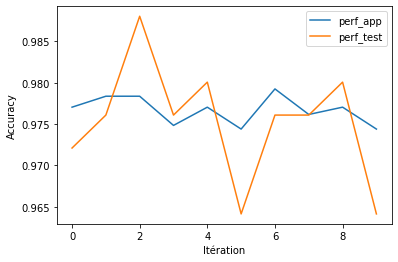

Accuracy moyenne apprentissage :  0.9766990291262136
Accuracy moyenne test :  0.9752988047808765


In [57]:
nb_iter = 10
perf_app = []
perf_test = []
dim = 18
#dim = len(data_fromage[0])
#print(str(dim))

# mélanger des exemples
index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]


# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = cl.ClassifierKNN(dim, 23)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

### Test de classification Perceptron

e = 0.09 Taux de bonne classification moyen (base test) : 0.9422310756972112
e = 0.09 Taux de bonne classification moyen (base apprentissage): 0.9409532215357458


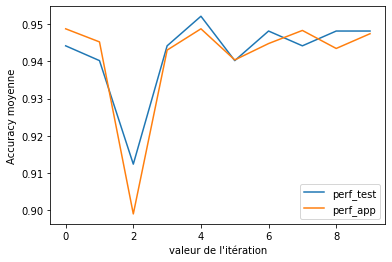

Accuracy moyenne apprentissage :  0.9409532215357458
Accuracy moyenne test :  0.9422310756972112


In [58]:
index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]
e = 0.09
nb_iter = 10
dim = 18

perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = cl.ClassifierPerceptron(dim,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen (base test) : " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen (base apprentissage): " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

### Test de classification ArbreNumerique

In [ ]:
seuils_entropie = np.arange(0.0, 1.01, 0.1)
liste_perf_moy = []
dim = 18
nb_iter = 10


for s in seuils_entropie :   
    arbre = cl.ClassifierArbreNumerique(dim,s, Xnoms)
    perf, perf_moy, perf_sd = cl.validation_croisee(arbre, (X,Y), nb_iter)
    liste_perf_moy.append(perf_moy)
    print("\nseuil ", s, 'accuracy moyenne: {perf_moy:.3f}\técart type: {perf_sd:.3f}')
          
          
# affichage de la variation de l'accuracy en fonction du choix du seuil:
plt.plot(liste_perf_moy,seuils_entropies)
plt.ylabel('entropie')
plt.xlabel('seuil')
plt.show()

# 2. Apprentissages non supervisées

## <u>Problématique:</u> Peut-on catégoriser un groupe d'aliment en sous-groupe d'aliment et plus précisément les matières grasses?

### 2.1 Clustering Hierarchique

In [3]:
X_ref= pd.read_csv("data/AGRIBALYSE3-synthese.csv",sep=";")

X = copy.deepcopy(X_ref[X_ref['Groupe d\'aliment'] == 'matières grasses'])
X_ref= copy.deepcopy(X)

X.drop(['Code AGB', 'Code CIQUAL', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Nom du Produit en Français',
        'LCI Name', 'code saison','code avion', 'Livraison', 'Matériau d\'emballage', 'Préparation', 'DQR','Score unique EF 3.1',
        'Changement climatique','Appauvrissement de la couche d\'ozone','Rayonnements ionisants','Formation photochimique d\'ozone','Particules fines',
        'Acidification terrestre et eaux douces','Eutrophisation eaux douces','Eutrophisation marine',
        'Eutrophisation terrestre','Écotoxicité pour écosystèmes aquatiques d\'eau douce','Utilisation du sol'
        ], axis=1, inplace = True)

Distance minimale trouvée entre [3, 4] = 0.0
Distance minimale trouvée entre [5, 6] = 0.0
Distance minimale trouvée entre [8, 9] = 0.0
Distance minimale trouvée entre [10, 11] = 0.0
Distance minimale trouvée entre [17, 29] = 0.0
Distance minimale trouvée entre [19, 20] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [34, 55] = 0.0
Distance minimale trouvée entre [37, 38] = 0.0
Distance minimale trouvée entre [39, 40] = 0.0
Distance minimale trouvée entre [58, 59] = 0.0
Distance minimale trouvée entre [61, 62] = 0.0
Distance minimale trouvée entre [16, 57] = 0.0013491365729261194
Distance minimale trouvée entre [45, 47] = 0.002879008290985356
Distance minimale trouvée entre [1, 2] = 0.0031319225223431345
Distance minimale trouvée entre [56, 68] = 0.003430253729336863
Distance minimale trouvée entre [46, 48] = 0.0142461760895419
Distance minimale trouvée entre [42, 51] = 0.014729432633811986
Distance minimale trouvée entre [43, 44] = 0.015462839490611

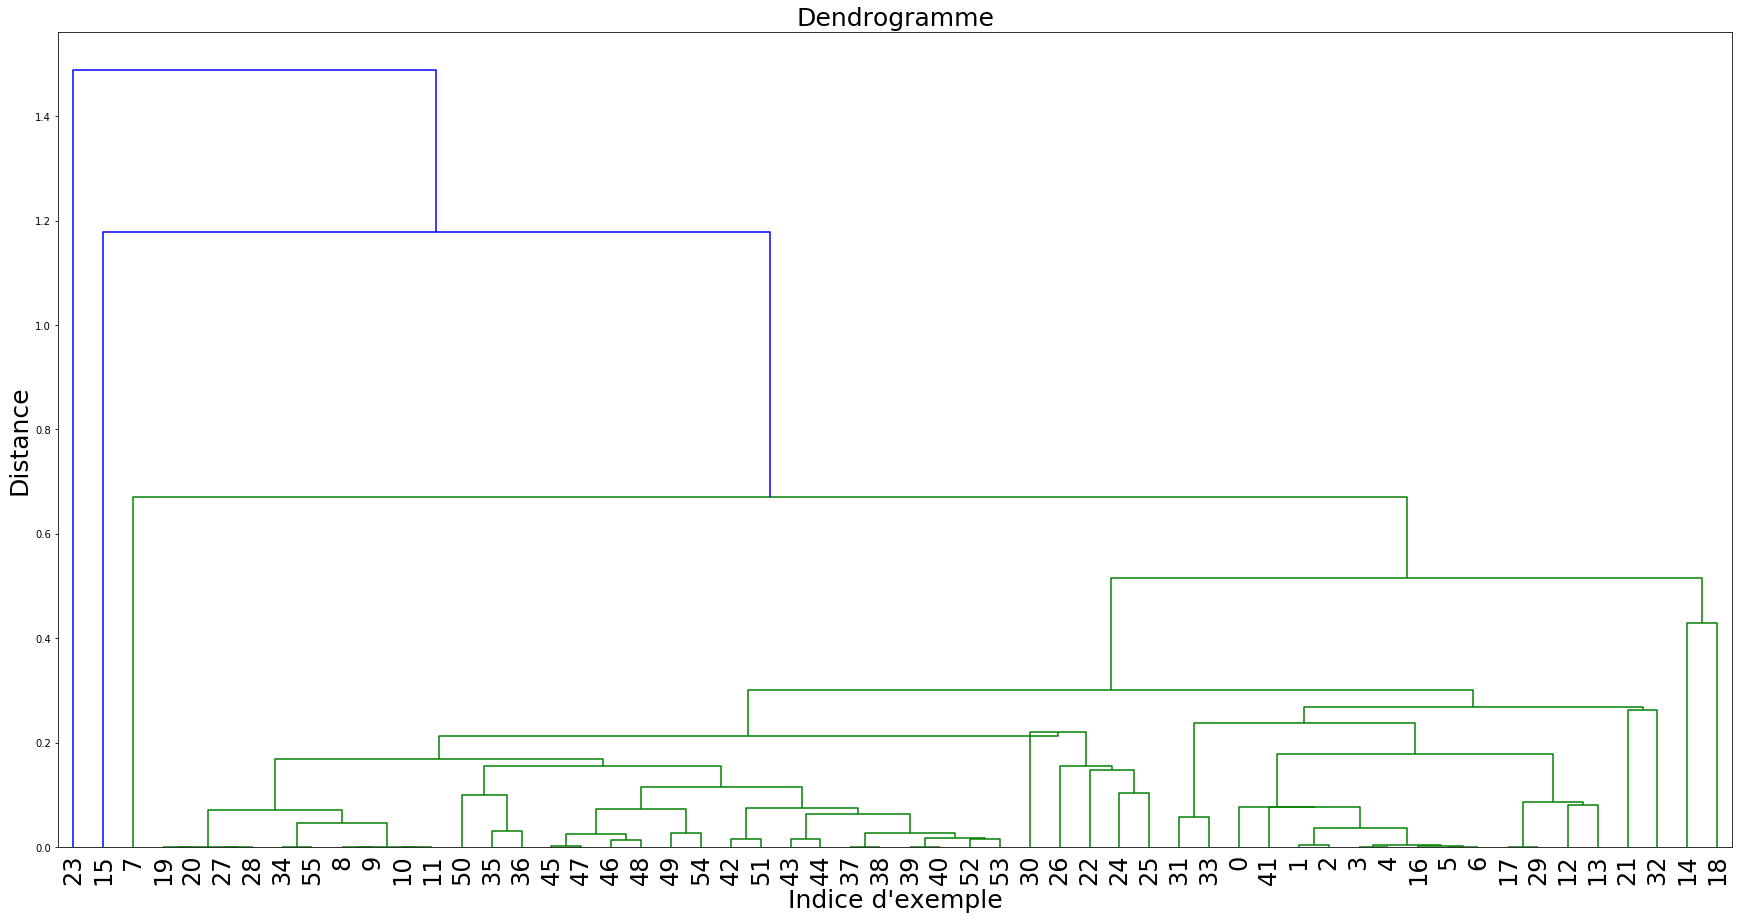

In [4]:
clust.normalisation(X)
start_time = time.time()
res_centroid = clust.CHA(X,linkage='centroid',verbose=True,dendrogramme=True)

tmp_centroide = time.time() - start_time

Distance minimale trouvée entre [3, 4] = 0.0
Distance minimale trouvée entre [5, 6] = 0.0
Distance minimale trouvée entre [8, 9] = 0.0
Distance minimale trouvée entre [10, 11] = 0.0
Distance minimale trouvée entre [17, 29] = 0.0
Distance minimale trouvée entre [19, 20] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [34, 55] = 0.0
Distance minimale trouvée entre [37, 38] = 0.0
Distance minimale trouvée entre [39, 40] = 0.0
Distance minimale trouvée entre [58, 59] = 0.0
Distance minimale trouvée entre [61, 62] = 0.0
Distance minimale trouvée entre [16, 57] = 0.0013491365729261194
Distance minimale trouvée entre [45, 47] = 0.002879008290985356
Distance minimale trouvée entre [1, 2] = 0.0031319225223431345
Distance minimale trouvée entre [56, 68] = 0.003771618275340048
Distance minimale trouvée entre [46, 48] = 0.0142461760895419
Distance minimale trouvée entre [42, 51] = 0.014729432633811986
Distance minimale trouvée entre [43, 44] = 0.015462839490611

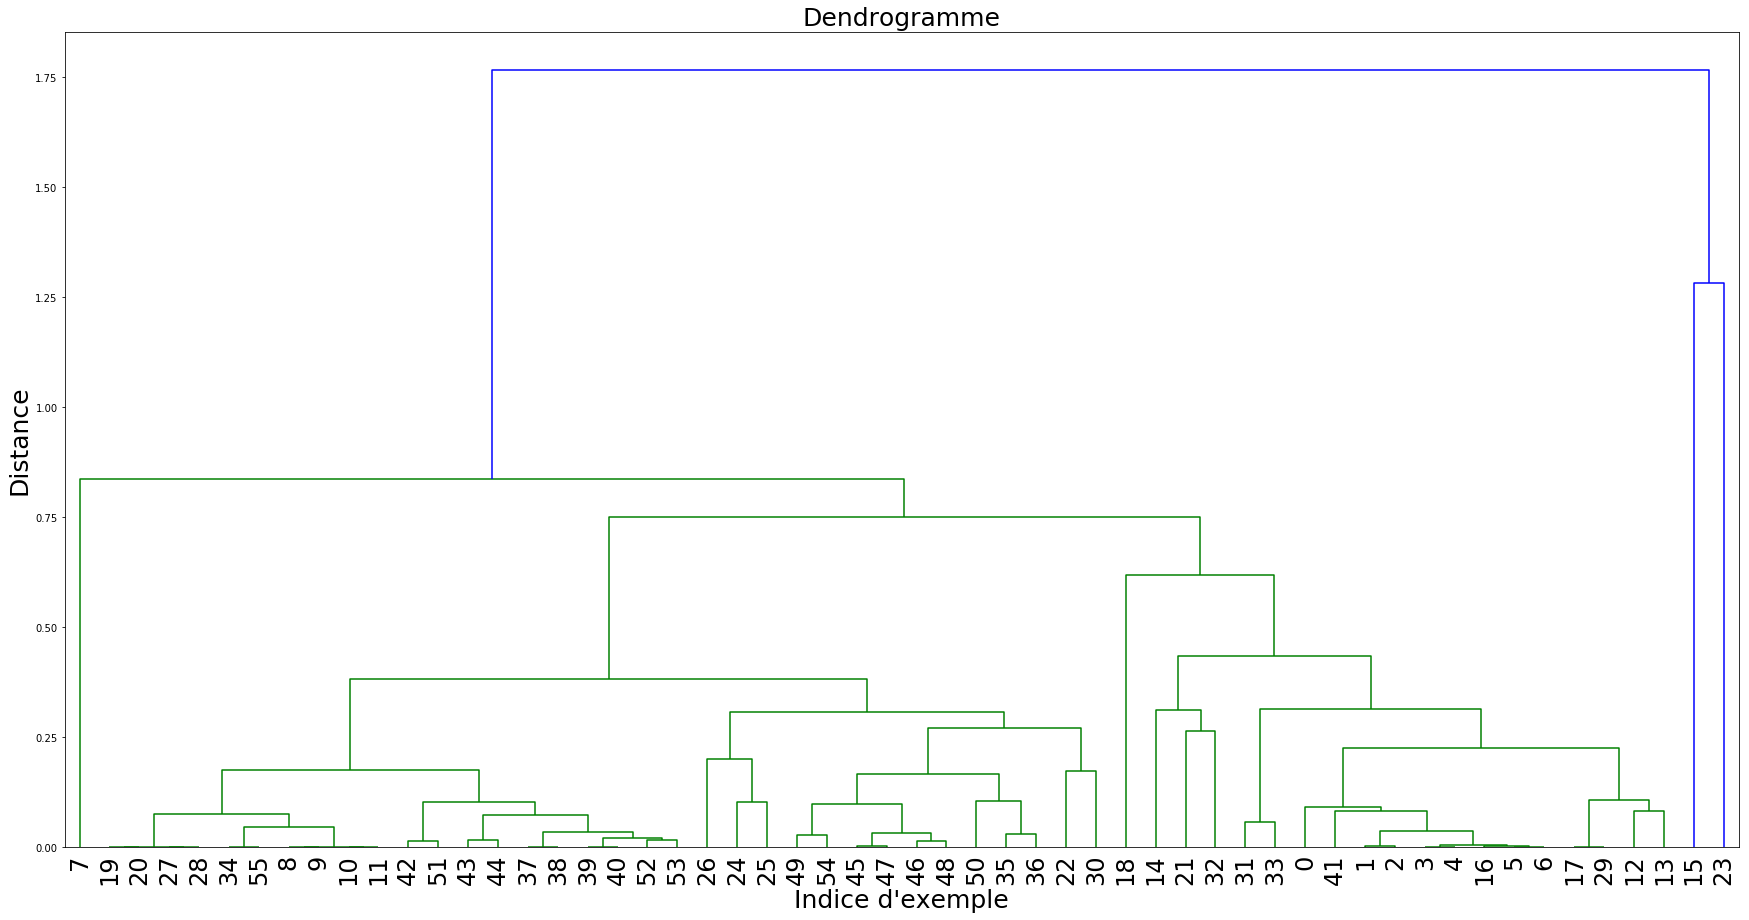

In [5]:
start_time = time.time()
res_centroid = clust.CHA(X,linkage='complete',verbose=True,dendrogramme=True)
tmp_complete = time.time() - start_time

Distance minimale trouvée entre [3, 4] = 0.0
Distance minimale trouvée entre [5, 6] = 0.0
Distance minimale trouvée entre [8, 9] = 0.0
Distance minimale trouvée entre [10, 11] = 0.0
Distance minimale trouvée entre [17, 29] = 0.0
Distance minimale trouvée entre [19, 20] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [34, 55] = 0.0
Distance minimale trouvée entre [37, 38] = 0.0
Distance minimale trouvée entre [39, 40] = 0.0
Distance minimale trouvée entre [58, 59] = 0.0
Distance minimale trouvée entre [61, 62] = 0.0
Distance minimale trouvée entre [16, 57] = 0.0013491365729261194
Distance minimale trouvée entre [45, 47] = 0.002879008290985356
Distance minimale trouvée entre [1, 2] = 0.0031319225223431345
Distance minimale trouvée entre [56, 68] = 0.003338282781332383
Distance minimale trouvée entre [46, 48] = 0.0142461760895419
Distance minimale trouvée entre [42, 51] = 0.014729432633811986
Distance minimale trouvée entre [43, 44] = 0.015462839490611

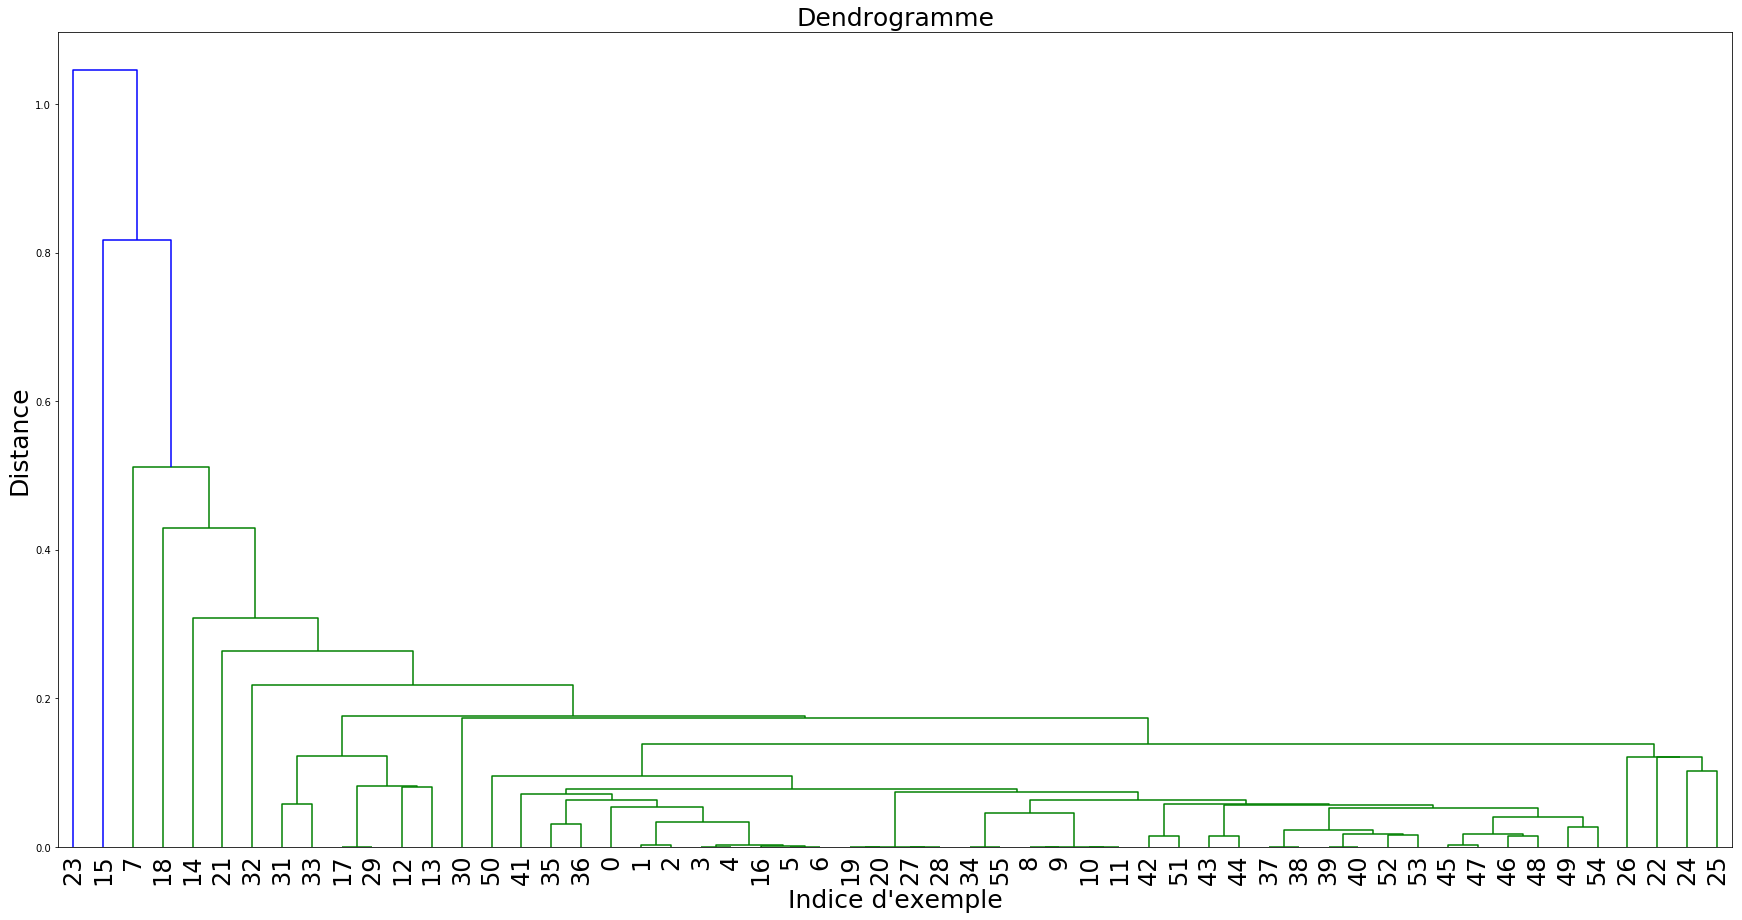

In [6]:
start_time = time.time()
res_centroid = clust.CHA(X,linkage='simple',verbose=True,dendrogramme=True)
tmp_simple = time.time() - start_time

Distance minimale trouvée entre [3, 4] = 0.0
Distance minimale trouvée entre [5, 6] = 0.0
Distance minimale trouvée entre [8, 9] = 0.0
Distance minimale trouvée entre [10, 11] = 0.0
Distance minimale trouvée entre [17, 29] = 0.0
Distance minimale trouvée entre [19, 20] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [34, 55] = 0.0
Distance minimale trouvée entre [37, 38] = 0.0
Distance minimale trouvée entre [39, 40] = 0.0
Distance minimale trouvée entre [58, 59] = 0.0
Distance minimale trouvée entre [61, 62] = 0.0
Distance minimale trouvée entre [16, 57] = 0.0013491365729261194
Distance minimale trouvée entre [45, 47] = 0.002879008290985356
Distance minimale trouvée entre [1, 2] = 0.0031319225223431345
Distance minimale trouvée entre [68, 56] = 0.0034827279460016044
Distance minimale trouvée entre [46, 48] = 0.0142461760895419
Distance minimale trouvée entre [42, 51] = 0.014729432633811986
Distance minimale trouvée entre [43, 44] = 0.01546283949061

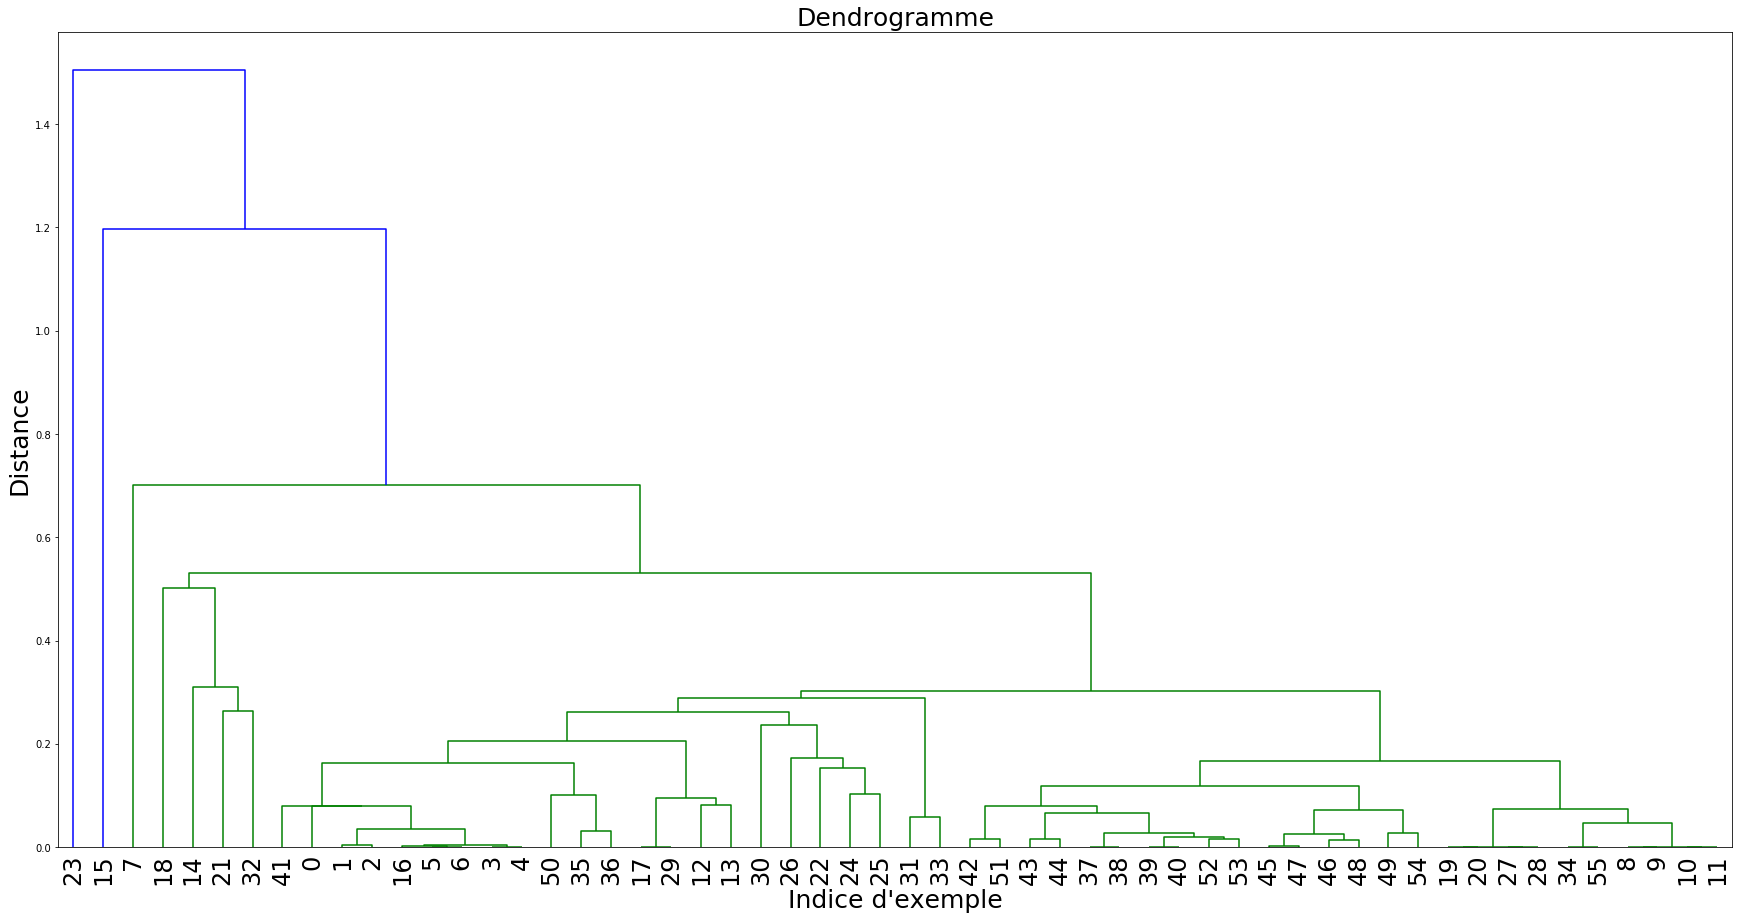

In [7]:
start_time = time.time()
res_centroid = clust.CHA(X,linkage='average',verbose=True,dendrogramme=True)
tmp_average = time.time() - start_time

#### Analyse des résultats: 
Les dendogrammes des différents linkage de l'algorithme de clustering hiérarchique, nous indiquent 2 catégories principales dans le classement des matières grasses.

#### Temps d'exécution

In [8]:
print("temps d'exécution centroïde : " + str(tmp_centroide) + "s")
print("temps d'exécution complete : " + str(tmp_complete) + "s")
print("temps d'exécution simple : " + str(tmp_simple) + "s")
#print("temps d'exécution average" + str(tmp_average))

temps d'exécution centroïde : 25.209965467453003s
temps d'exécution complete : 83.33385014533997s
temps d'exécution simple : 78.69777989387512s


### 2.2 Algorithme de K-Moyenne

In [9]:
X_ref= pd.read_csv("data/AGRIBALYSE3-synthese.csv",sep=";")

X = copy.deepcopy(X_ref[X_ref['Groupe d\'aliment'] == 'matières grasses'])
X_ref= copy.deepcopy(X)

X.drop(['Code AGB', 'Code CIQUAL', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Nom du Produit en Français',
        'LCI Name', 'code saison','code avion', 'Livraison', 'Matériau d\'emballage', 'Préparation', 'DQR','Score unique EF 3.1',
        'Changement climatique','Appauvrissement de la couche d\'ozone','Rayonnements ionisants','Formation photochimique d\'ozone','Particules fines',
        'Acidification terrestre et eaux douces','Eutrophisation eaux douces','Eutrophisation marine',
        'Eutrophisation terrestre','Écotoxicité pour écosystèmes aquatiques d\'eau douce','Utilisation du sol'
        ], axis=1, inplace = True)

D'après le clustering hierarchique qui a déduit 2 catégories dans les matières grasses, on peut poser K=2

iteration 0 Inertie : 16367.757840061764 Difference: 16367.757840061764
iteration 1 Inertie : 10363.730601638203 Difference: 6004.027238423561
iteration 2 Inertie : 8573.08784298546 Difference: 1790.6427586527425
iteration 3 Inertie : 8039.436122986226 Difference: 533.651719999234
iteration 4 Inertie : 7685.779070408224 Difference: 353.65705257800255
iteration 5 Inertie : 7685.779070408224 Difference: 0.0

index de dunn: 0.5427537895322111
index de xie-beni: 32.60786127734864


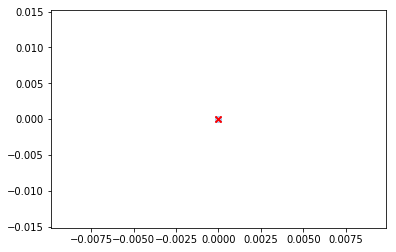

In [10]:
K = 2
epsilon = 0.05
iter_max = 1000

start_time = time.time()
les_centres, l_affectation = clust.kmoyennes(K, X, epsilon, iter_max)
tmp_kmoyenne = time.time() - start_time

idu = clust.dunn_index(les_centres, l_affectation)
print("\nindex de dunn: " + str(idu))
ix = clust.xie_beni_index(les_centres, l_affectation)
print("index de xie-beni: " + str(ix))

clust.affiche_resultat(X,les_centres,l_affectation)

#### Analyse du résultat

On sait que plus l'index de dunn est élevé, mieux est la séparation entre les clusters.
Et contrairement à l'index de dunn, plus l'index de xie-beni est faible, plus compacts et mieux séparés sont les clusters.


Cependant, en observant le sous-groupe de chaques exemples des différents clusters ci-dessous.
On peut observer 4 sous-groupe différents.

Cela peut s'expliquer par le fait que la description des différents exemples soient trop similaires et donc a du mal à être catégoriser.

In [11]:
for k in l_affectation:
    print()
    print("--------------- CHANGEMENT DE K --------------")
    print()
    for i in l_affectation[k]:
        e = X_ref.iloc[i]
        print(e['Sous-groupe d\'aliment'])


--------------- CHANGEMENT DE K --------------

beurres
beurres
beurres
beurres
beurres
beurres
beurres
huiles et graisses végétales
autres matières grasses
autres matières grasses
autres matières grasses
autres matières grasses
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
beurres
huiles et graisses végétales
huiles de poissons
huiles de poissons
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles de poissons
huiles de poissons
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
autres matières grasses
beurres
beurres
margarines
margarines
margarines
margarines
huiles et graisses végétales
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
autres matières grasses


#### Temps d'exécution

In [12]:
print("temps d'exécution k-moyenne: " + str(tmp_kmoyenne) + "s")

temps d'exécution k-moyenne: 0.06456542015075684s
